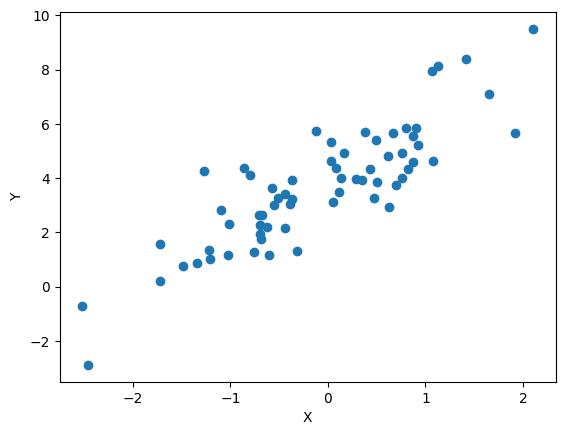

initial weight : [ 0.93781998 -0.21075119  2.78995001 -0.79022481 -1.31229379  1.97881481
  0.32090425 -0.35321977 -0.35443462  1.29460327 -0.03206364 -1.17121052
  1.86851705  1.00410346 -1.63300457  0.57863385 -0.42336489 -0.51895374
  0.25403697 -1.14317432 -1.68318465  0.4394004   1.57183649  0.19587357
 -0.73550256 -0.54054354 -0.74592775 -0.25374376 -0.66330712 -0.46305447
  1.71707698 -0.88101163  0.34686974 -0.0187211  -0.2698898  -1.95737437
  1.25214976 -1.50231524 -1.00014693  0.67040586 -2.06643027  0.02311313
 -0.20611995  0.78098855  0.33278126  2.10337502 -2.19776243 -1.53055276
 -0.57017252 -0.5751234  -0.59671794  0.59773891 -1.18477122 -2.32465339
 -0.15989263 -0.95311179  0.04148455 -0.17061957  0.31980914 -1.65736505
  0.11869965  0.29461915 -0.63279667  1.83528719  1.00478065]
Original value a =  4  New calculated value w1 =  3.8561358260039174
Original value b =  2  New calculated value w1 =  1.9106783432195233


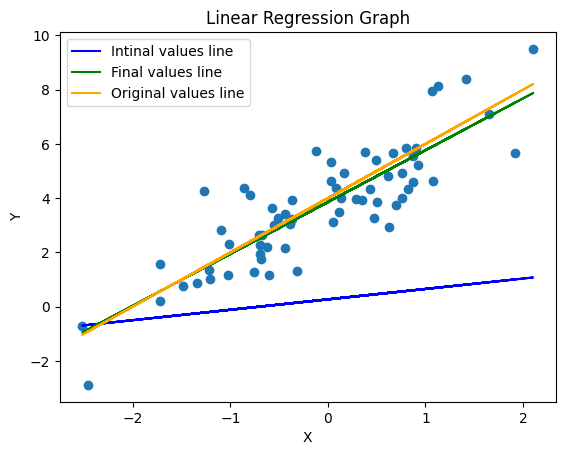

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random

a = 4  # height
b = 2  # slope

# generate data
N = 65
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b * X + W

# plot data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("initial weight :", W)

def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0

    # running the loop for total numer of samples in dataset
    for i in range(n):
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2

    mse = total_error / n
    return mse
    # A function that calculates the Gradient/partial derivative of MSE


# We use partial derivatives to find how each individual parameter (w1 and w2)
# affects MSE and to update the values of w1 and w2
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0

    # calculate the mse partial derivatives of w1 and w2
    # for number of samples in the dataset as we calculated them above
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]

    # take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n

    return partial_derivative_w1, partial_derivative_w2
    # This function implements the gradient descent algorithm

def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):
    mse_list = []

    for i in range(num_iterations):
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2

        mse_list.append(mean_square_error(X, Y, w1, w2))
    # return the final calculated derivatives
    return w1, w2, mse_list
initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

# define the learning rate and no of iterations we need to calculate
learning_rate = 0.1
iterations = 100

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2, mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

# Print the original and new calculated values of a and b
print("Original value a = ", a, " New calculated value w1 = ", final_w1)
print("Original value b = ", b, " New calculated value w1 = ", final_w2)


def predict(Y, X, w1, w2):
    Y_pred = []
    for x in X:
        val = w2 * x + w1
        Y_pred.append(val)
    return Y_pred
    plt.figure(figsize=(10, 10))


# plot data as given above
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y, X, initial_w1, initial_w2)
plt.plot(X, get_preds, color='b', label="Intinal values line")

get_preds = predict(Y, X, final_w1, final_w2)
plt.plot(X, get_preds, color='g', label="Final values line")

get_preds = predict(Y, X, a, b)
plt.plot(X, get_preds, color='orange', label="Original values line")

# Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()